Q1. 

This question is a case study for k nearest neighbor regression, using the USA_cars_datasets.csv data.

The target variable y is price and the features are year and mileage.

1) Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv( "/workspace/knn/data/USA_cars_datasets.csv" )
for idx, (column, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"{idx}. {column}: {dtype}")


1. Unnamed: 0: int64
2. price: int64
3. brand: object
4. model: object
5. year: int64
6. title_status: object
7. mileage: int64
8. color: object
9. vin: object
10. lot: int64
11. state: object
12. country: object
13. condition: object


In [2]:

# drop columns

df = df.filter(items=['price', 'year', 'mileage'])
for idx, (column, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"{idx}. {column}: {dtype}")

print( "\n" )
print( df.shape )
# the dataset now has 3 columns and 2499 rows

print( "\n" )
print( df.head() )
print( '\n' )
# first five rows look normal

# drop null values
df.dropna()
print( df.shape )
# no nulls to drop



1. price: int64
2. year: int64
3. mileage: int64


(2499, 3)


   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


(2499, 3)


2) Maxmin normalize year and mileage.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# min max scale code (generated using chat gpt):
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
columns_to_scale = ['year', 'mileage']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the modified dataframe
print(df)

      price      year   mileage
0      6300  0.744681  0.269287
1      2899  0.808511  0.187194
2      5350  0.957447  0.038892
3     25000  0.872340  0.063016
4     27700  0.957447  0.006537
...     ...       ...       ...
2494   7800  0.978723  0.023193
2495   9200  0.957447  0.033944
2496   9200  0.957447  0.031037
2497   9200  0.957447  0.031983
2498   9200  0.957447  0.030818

[2499 rows x 3 columns]


3) Split the sample into ~80% for training and ~20% for evaluation.

In [4]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4) Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

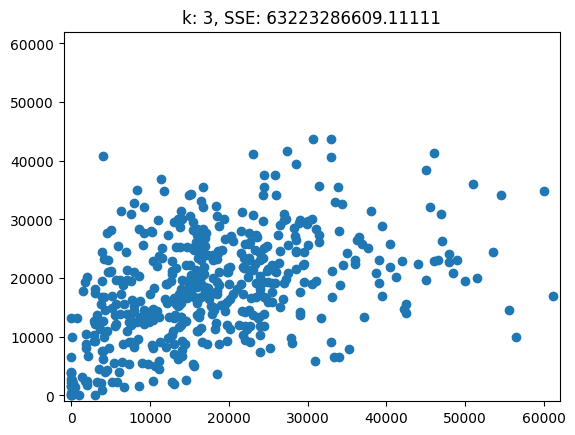

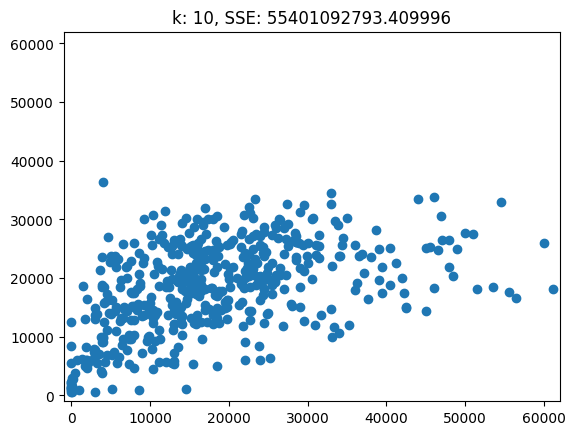

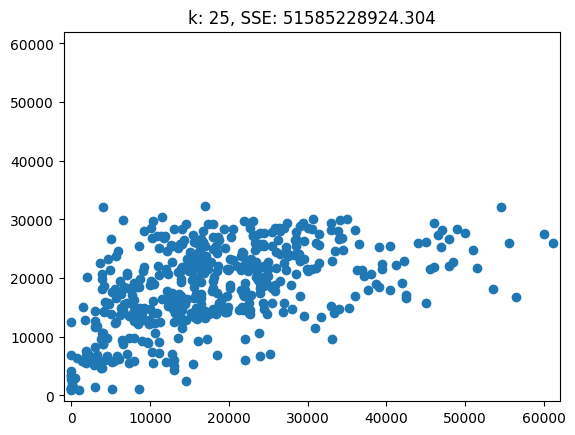

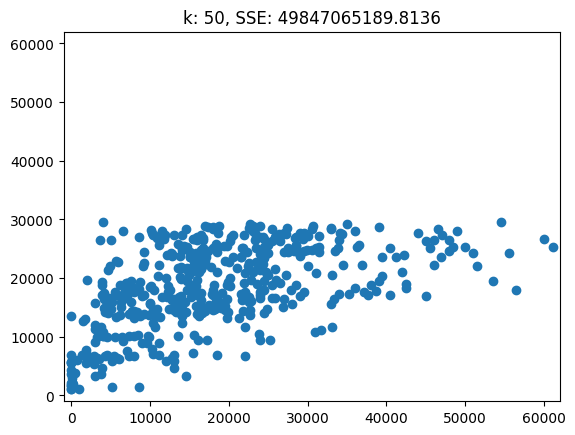

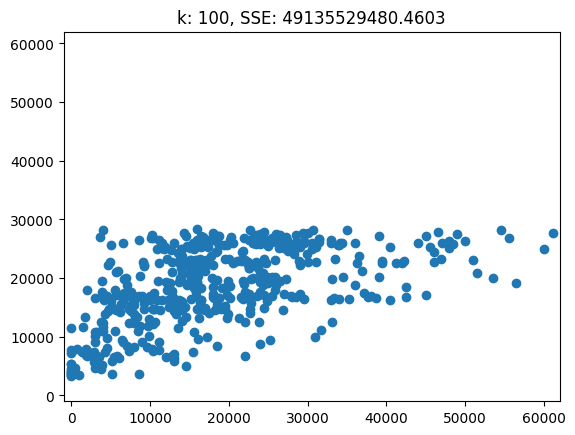

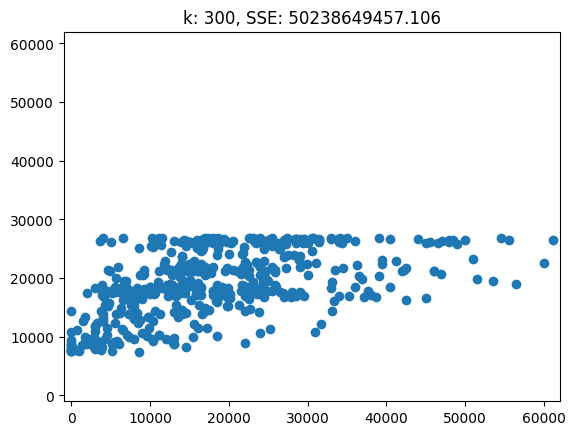

In [5]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    #
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

# As k increases, the top boundary of the scatter distribution gets lower & flattens out.

5) Determine the optimal $k$ for these data.

[77]


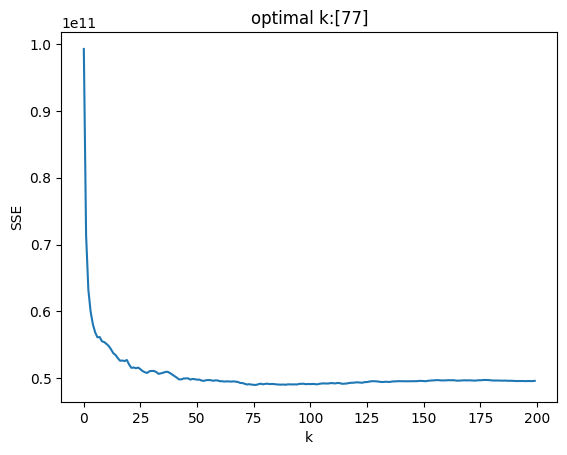

In [6]:
k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
 
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As k increases, the range of predictions becomes less varied, with a greater tendency towards average predicted values. Since the optimal k value is 77, values of k over 77 will be overfitting, whereas values less than 77 will be underfitting (low precision). 